In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Lectura de datos

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
training_set = dataset_train.iloc[:, 1:2].values

In [5]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

# Escalado de características

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

## Creación de una estructura de datos con 10 pasos de tiempo y 1 salida

### numero de pasos atras

In [8]:
pasos_atras=3
n_datos = training_set_scaled.shape[0]

In [9]:
X_train = []
y_train = []
for i in range(pasos_atras, n_datos):
    X_train.append(training_set_scaled[i-pasos_atras:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

## Nuevo conjunto de entrenamiento

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
import os
cadena = np.array2string(X_train.squeeze(), formatter={'float_kind': lambda x: "{:.3f}".format(x)}, separator='\t', threshold=np.inf)

print(cadena)


[[0.086	0.097	0.094]
 [0.097	0.094	0.092]
 [0.094	0.092	0.080]
 [0.092	0.080	0.064]
 [0.080	0.064	0.059]
 [0.064	0.059	0.066]
 [0.059	0.066	0.061]
 [0.066	0.061	0.066]
 [0.061	0.066	0.061]
 [0.066	0.061	0.075]
 [0.061	0.075	0.028]
 [0.075	0.028	0.024]
 [0.028	0.024	0.024]
 [0.024	0.024	0.016]
 [0.024	0.016	0.011]
 [0.016	0.011	0.010]
 [0.011	0.010	0.016]
 [0.010	0.016	0.021]
 [0.016	0.021	0.023]
 [0.021	0.023	0.023]
 [0.023	0.023	0.028]
 [0.023	0.028	0.032]
 [0.028	0.032	0.043]
 [0.032	0.043	0.045]
 [0.043	0.045	0.048]
 [0.045	0.048	0.044]
 [0.048	0.044	0.046]
 [0.044	0.046	0.047]
 [0.046	0.047	0.049]
 [0.047	0.049	0.039]
 [0.049	0.039	0.041]
 [0.039	0.041	0.040]
 [0.041	0.040	0.048]
 [0.040	0.048	0.043]
 [0.048	0.043	0.044]
 [0.043	0.044	0.043]
 [0.044	0.043	0.046]
 [0.043	0.046	0.054]
 [0.046	0.054	0.057]
 [0.054	0.057	0.057]
 [0.057	0.057	0.056]
 [0.057	0.056	0.044]
 [0.056	0.044	0.045]
 [0.044	0.045	0.046]
 [0.045	0.046	0.044]
 [0.046	0.044	0.037]
 [0.044	0.037	0.045]
 [0.037	0.045

## Conjunto de pruebas

In [12]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [13]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

# Construccion RNR

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

## inicializacion de la RNR

In [15]:
red = Sequential()
numero_clases = 1

## Creacion de las capas

In [16]:
capa_1=SimpleRNN (50, 
                  activation="tanh",
                  use_bias=True,
                  dropout=0.2, 
                  recurrent_dropout=0.2, 
                  return_sequences=True,
                  input_shape = (X_train.shape[1], 1))
capa_2=SimpleRNN (50, 
                  activation="tanh",
                  use_bias=True,
                  dropout=0.2, 
                  recurrent_dropout=0.2, 
                  return_sequences=True)
capa_3=SimpleRNN (50, 
                  activation="tanh",
                  use_bias=True,
                  dropout=0.2, 
                  recurrent_dropout=0.2, 
                  return_sequences=True)
capa_4=SimpleRNN (50, 
                  activation="tanh",
                  use_bias=True,
                  dropout=0.2, 
                  recurrent_dropout=0.2
                 )
capa_5=Dense(numero_clases,
             use_bias=True,
             activation='relu')

In [17]:
red.add(capa_1)
red.add(capa_2)
red.add(capa_3)
red.add(capa_4)
red.add(capa_5)

In [18]:
red.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3, 50)             2600      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 3, 50)             5050      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 3, 50)             5050      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 17,801
Trainable params: 17,801
Non-trainable params: 0
_________________________________________________________________


## Compilacion del la RNR

In [19]:
red.compile(loss='mean_squared_error', 
            optimizer='adam', 
            metrics=['acc', 'mse'])

In [20]:
np.shape(X_train)

(1255, 3, 1)

In [21]:
np.shape(y_train)

(1255,)

## Entrenamiento

In [22]:
epocas=100
batch_size=32

In [23]:
import time
start = time.perf_counter()
rnr=red.fit(X_train,y_train,
            batch_size=batch_size,
            epochs=epocas #Cuantas epocas usaremos para entrenar
            #,validation_data=(X_test, y_test)
            #,shuffle=True
            #,validation_split=0.2
           )
end = time.perf_counter()
print(f'Tiempo:  {end - start:.3f} Segundos')

Epoch 1/100
40/40 [==============================] - 4s 6ms/step - loss: 0.1409 - acc: 0.0016 - mse: 0.1409
Epoch 2/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0759 - acc: 7.9681e-04 - mse: 0.0759
Epoch 3/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0458 - acc: 0.0016 - mse: 0.0458
Epoch 4/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0366 - acc: 0.0016 - mse: 0.0366
Epoch 5/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0334 - acc: 0.0016 - mse: 0.0334
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0277 - acc: 0.0016 - mse: 0.0277
Epoch 7/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0228 - acc: 0.0016 - mse: 0.0228
Epoch 8/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0199 - acc: 0.0016 - mse: 0.0199
Epoch 9/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0192 - acc: 0.0016 - mse: 0.0192
Epoch 10/100
40/40 [====

40/40 [==============================] - 0s 5ms/step - loss: 0.0056 - acc: 0.0016 - mse: 0.0056
Epoch 77/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0055 - acc: 0.0016 - mse: 0.0055
Epoch 78/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0078 - acc: 0.0016 - mse: 0.0078
Epoch 79/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0064 - acc: 0.0016 - mse: 0.0064
Epoch 80/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0062 - acc: 0.0016 - mse: 0.0062
Epoch 81/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0068 - acc: 0.0016 - mse: 0.0068
Epoch 82/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0056 - acc: 0.0016 - mse: 0.0056
Epoch 83/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0070 - acc: 0.0016 - mse: 0.0070
Epoch 84/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0048 - acc: 0.0016 - mse: 0.0048
Epoch 85/100
40/40 [============

# Predicciones

### concatenamos el conjunto de prueba con el conjunto de test bajo la columna que se está realizando la impresion 

In [24]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

In [25]:
inputs = dataset_total.iloc[len(dataset_total) - len(dataset_test) - pasos_atras:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
tam_entrada=inputs.shape[0]
tam_entrada

23

In [26]:
X_test = []
for i in range(pasos_atras, tam_entrada):
    X_test.append(inputs[i-pasos_atras:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [27]:
predicted_stock_price = red.predict(X_test)
#predicted_stock_price = predicted_stock_price.reshape(-1, 1)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 502ms/step


# Visualizacion de los datos

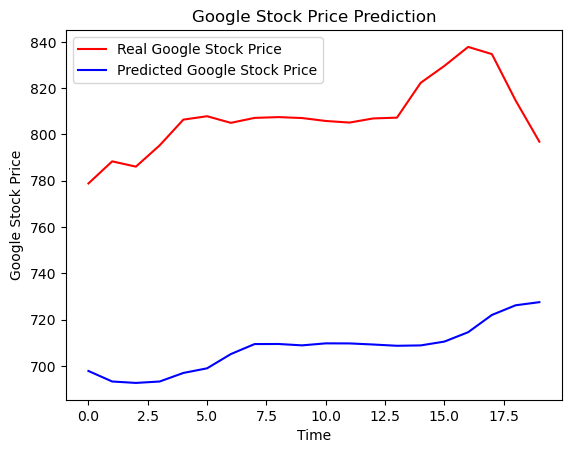

In [28]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()